In [1]:
!pip install rpy2

  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\backports\\__init__.py'
Consider using the `--user` option or check the permissions.



  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for rpy2: filename=rpy2-3.5.14-py3-none-any.whl size=220698 sha256=b994fea73ff6219d07d3a8175a44538b86d1d2ca13aa3a46a1502131eb9ac8f3
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\4e\c1\5f\4773f459a80b1814ea746232dd4ac71a04f68bc022758552f7
Successfully built rpy2


In [1]:
import numpy as np
import networkx as nx
import ergm

# `snapshots` now contains a list of NetworkX graphs representing the dynamic network


ModuleNotFoundError: No module named 'ergm'

In [ ]:

# Define parameters for the TERGM
theta = [0.5, -0.2]  # Example parameters (you may need to adjust these)
num_nodes = 20
num_snapshots = 10

# Initialize an empty list to store snapshots
snapshots = []

# Generate snapshots
for t in range(num_snapshots):
    if t == 0:
        # For the first snapshot, initialize an empty network
        g = nx.Graph()
        g.add_nodes_from(range(num_nodes))
    else:
        # For subsequent snapshots, use previous snapshot as a starting point
        g = snapshots[-1].copy()
    
    # Generate random edges based on TERGM parameters
    p = ergm.predict(t, theta)  # You may need to define the ergm.predict function
    new_edgebs = np.random.rand(num_nodes, num_nodes) < p
    np.fill_diagonal(new_edges, 0)  # Ensure no self-loops
    new_edges = np.triu(new_edges, 1)  # Keep only upper triangle (to avoid duplicates)
    edges_to_add = np.transpose(np.where(new_edges == 1))
    
    # Add new edges to the graph
    g.add_edges_from(edges_to_add)
    
    # Add the snapshot to the list
    snapshots.append(g)


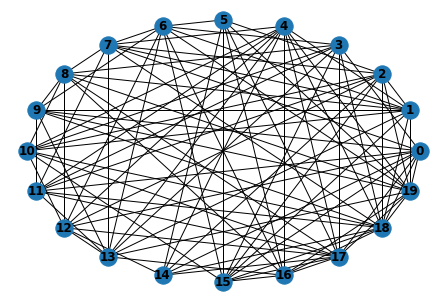

In [72]:
import networkx as nx
import random

def simulate_ergm(num_nodes, edge_prob, clustering_prob):
    # Initialize an empty graph
    g = nx.Graph()
    g.add_nodes_from(range(num_nodes))
    
    # Add edges based on the ERGM-like rule (clustering)
    for node in g.nodes():
        for other_node in g.nodes():
            if node != other_node:
                if random.random() < edge_prob:
                    g.add_edge(node, other_node)
                else:
                    # Apply clustering rule
                    if random.random() < clustering_prob:
                        common_neighbors = set(g.neighbors(node)) & set(g.neighbors(other_node))
                        for common_neighbor in common_neighbors:
                            if random.random() < edge_prob:
                                g.add_edge(node, common_neighbor)
                                g.add_edge(other_node, common_neighbor)
                        
    return g

# Parameters
num_nodes = 20
edge_prob = 0.3
clustering_prob = 0.5

# Simulate a network
simulated_network = simulate_ergm(num_nodes, edge_prob, clustering_prob)

# Print the edges of the simulated network
#print("Edges in the simulated network:")
#print(simulated_network.edges())
nx.draw_circular(simulated_network, with_labels=True, font_weight='bold')

In [10]:
simulated_network.draw()

AttributeError: 'Graph' object has no attribute 'draw'

In [74]:
!pip install rpy2

ERROR: Could not install packages due to an EnvironmentError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/30/dc/d9748ec2b61b6a1fcbaff3891961297c83cfa34c9f9984761fb6f6ae65d0/rpy2-3.5.14.tar.gz (Caused by ConnectTimeoutError(<pip._vendor.urllib3.connection.HTTPSConnection object at 0x00000104D953FAC0>, 'Connection to files.pythonhosted.org timed out. (connect timeout=15)'))

